In [321]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

## Training Categorical Data

In [324]:
train_categorical=pd.read_excel("../TRAIN/TRAIN_CATEGORICAL_METADATA.xlsx")

In [325]:
train_categorical.head()

,participant_id,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
0,UmrK0vMLopoR,2016,1,0.0,0,1,21,45,21,45
1,CPaeQkhcjg7d,2019,3,1.0,2,3,15,15,0,0
2,Nb4EetVPm3gs,2016,1,1.0,8,1,18,40,0,0
3,p4vPhVu91o4b,2018,3,0.0,8,3,15,30,18,0
4,M09PXs7arQ5E,2019,3,0.0,1,3,15,20,0,0


In [326]:
train_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   participant_id                    1213 non-null   object 
 1   Basic_Demos_Enroll_Year           1213 non-null   int64  
 2   Basic_Demos_Study_Site            1213 non-null   int64  
 3   PreInt_Demos_Fam_Child_Ethnicity  1202 non-null   float64
 4   PreInt_Demos_Fam_Child_Race       1213 non-null   int64  
 5   MRI_Track_Scan_Location           1213 non-null   int64  
 6   Barratt_Barratt_P1_Edu            1213 non-null   int64  
 7   Barratt_Barratt_P1_Occ            1213 non-null   int64  
 8   Barratt_Barratt_P2_Edu            1213 non-null   int64  
 9   Barratt_Barratt_P2_Occ            1213 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 94.9+ KB


In [327]:
train_categorical.describe()

,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ
count,1213.000000,1213.000000,1202.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000
mean,2017.652102,2.014839,0.424293,2.080791,2.288541,17.641385,24.892828,14.122012,24.719703
std,1.122522,1.135147,0.687470,3.164636,0.758348,4.004639,17.025899,7.201023,17.171113
min,2015.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2017.000000,1.000000,0.000000,0.000000,2.000000,15.000000,0.000000,12.000000,5.000000
50%,2018.000000,1.000000,0.000000,0.000000,2.000000,18.000000,30.000000,18.000000,30.000000
75%,2019.000000,3.000000,1.000000,2.000000,3.000000,21.000000,40.000000,21.000000,40.000000
max,2020.000000,4.000000,3.000000,11.000000,4.000000,21.000000,45.000000,21.000000,45.000000


In [328]:
unique_counts = train_categorical.nunique()
unique_counts


participant_id                      1213
Basic_Demos_Enroll_Year                6
Basic_Demos_Study_Site                 4
PreInt_Demos_Fam_Child_Ethnicity       4
PreInt_Demos_Fam_Child_Race           10
MRI_Track_Scan_Location                5
Barratt_Barratt_P1_Edu                 8
Barratt_Barratt_P1_Occ                10
Barratt_Barratt_P2_Edu                 8
Barratt_Barratt_P2_Occ                10
dtype: int64

In [329]:
train_categorical["Basic_Demos_Study_Site"].nunique()

4

In [330]:
unique_values = train_categorical['Basic_Demos_Study_Site'].value_counts()
print(unique_values)

Basic_Demos_Study_Site
1    652
3    430
4    120
2     11
Name: count, dtype: int64


In [331]:
train_categorical.isnull().sum()

participant_id                       0
Basic_Demos_Enroll_Year              0
Basic_Demos_Study_Site               0
PreInt_Demos_Fam_Child_Ethnicity    11
PreInt_Demos_Fam_Child_Race          0
MRI_Track_Scan_Location              0
Barratt_Barratt_P1_Edu               0
Barratt_Barratt_P1_Occ               0
Barratt_Barratt_P2_Edu               0
Barratt_Barratt_P2_Occ               0
dtype: int64

In [332]:
train_categorical["PreInt_Demos_Fam_Child_Ethnicity"] = train_categorical["PreInt_Demos_Fam_Child_Ethnicity"].fillna(3).astype(int)

In [335]:
train_categorical["MRI_Track_Scan_Location"].dtype

dtype('int64')

In [341]:
train_categorical_encoded = pd.get_dummies(train_categorical, columns=['Basic_Demos_Study_Site', 'PreInt_Demos_Fam_Child_Ethnicity','MRI_Track_Scan_Location'], drop_first=False)
train_categorical_encoded.head()

,participant_id,Basic_Demos_Enroll_Year,PreInt_Demos_Fam_Child_Race,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ,Basic_Demos_Study_Site_1,Basic_Demos_Study_Site_2,Basic_Demos_Study_Site_3,Basic_Demos_Study_Site_4,PreInt_Demos_Fam_Child_Ethnicity_0,PreInt_Demos_Fam_Child_Ethnicity_1,PreInt_Demos_Fam_Child_Ethnicity_2,PreInt_Demos_Fam_Child_Ethnicity_3,MRI_Track_Scan_Location_0,MRI_Track_Scan_Location_1,MRI_Track_Scan_Location_2,MRI_Track_Scan_Location_3,MRI_Track_Scan_Location_4
0,UmrK0vMLopoR,2016,0,21,45,21,45,True,False,False,False,True,False,False,False,False,True,False,False,False
1,CPaeQkhcjg7d,2019,2,15,15,0,0,False,False,True,False,False,True,False,False,False,False,False,True,False
2,Nb4EetVPm3gs,2016,8,18,40,0,0,True,False,False,False,False,True,False,False,False,True,False,False,False
3,p4vPhVu91o4b,2018,8,15,30,18,0,False,False,True,False,True,False,False,False,False,False,False,True,False
4,M09PXs7arQ5E,2019,1,15,20,0,0,False,False,True,False,True,False,False,False,False,False,False,True,False


In [344]:
train_categorical_encoded = train_categorical_encoded.apply(lambda x: x.astype(int) if x.dtype == 'bool' else x)
train_categorical_encoded.head()

,participant_id,Basic_Demos_Enroll_Year,PreInt_Demos_Fam_Child_Race,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ,Basic_Demos_Study_Site_1,Basic_Demos_Study_Site_2,Basic_Demos_Study_Site_3,Basic_Demos_Study_Site_4,PreInt_Demos_Fam_Child_Ethnicity_0,PreInt_Demos_Fam_Child_Ethnicity_1,PreInt_Demos_Fam_Child_Ethnicity_2,PreInt_Demos_Fam_Child_Ethnicity_3,MRI_Track_Scan_Location_0,MRI_Track_Scan_Location_1,MRI_Track_Scan_Location_2,MRI_Track_Scan_Location_3,MRI_Track_Scan_Location_4
0,UmrK0vMLopoR,2016,0,21,45,21,45,1,0,0,0,1,0,0,0,0,1,0,0,0
1,CPaeQkhcjg7d,2019,2,15,15,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
2,Nb4EetVPm3gs,2016,8,18,40,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
3,p4vPhVu91o4b,2018,8,15,30,18,0,0,0,1,0,1,0,0,0,0,0,0,1,0
4,M09PXs7arQ5E,2019,1,15,20,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0


In [345]:
train_categorical_encoded.columns

Index(['participant_id', 'Basic_Demos_Enroll_Year',
       'PreInt_Demos_Fam_Child_Race', 'Barratt_Barratt_P1_Edu',
       'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Edu',
       'Barratt_Barratt_P2_Occ', 'Basic_Demos_Study_Site_1',
       'Basic_Demos_Study_Site_2', 'Basic_Demos_Study_Site_3',
       'Basic_Demos_Study_Site_4', 'PreInt_Demos_Fam_Child_Ethnicity_0',
       'PreInt_Demos_Fam_Child_Ethnicity_1',
       'PreInt_Demos_Fam_Child_Ethnicity_2',
       'PreInt_Demos_Fam_Child_Ethnicity_3', 'MRI_Track_Scan_Location_0',
       'MRI_Track_Scan_Location_1', 'MRI_Track_Scan_Location_2',
       'MRI_Track_Scan_Location_3', 'MRI_Track_Scan_Location_4'],
      dtype='object')

## Functional Training Data

In [347]:
train_functional=pd.read_csv("../TRAIN/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES.csv")

In [348]:
train_functional.head()

,participant_id,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,0throw_6thcolumn,0throw_7thcolumn,0throw_8thcolumn,0throw_9thcolumn,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
0,70z8Q2xdTXM3,0.093473,0.146902,0.067893,0.015141,0.070221,0.063997,0.055382,-0.035335,0.068583,...,0.003404,-0.010359,-0.050968,-0.014365,0.128066,0.112646,-0.058980,0.028228,0.133582,0.143372
1,WHWymJu6zNZi,0.029580,0.179323,0.112933,0.038291,0.104899,0.064250,0.008488,0.077505,-0.004750,...,-0.008409,-0.008479,0.020891,0.017754,0.094040,0.035141,0.032537,0.075007,0.115350,0.138200
2,4PAQp1M6EyAo,-0.051580,0.139734,0.068295,0.046991,0.111085,0.026978,0.151377,0.021198,0.083721,...,0.053245,-0.028003,0.028773,0.024556,0.166343,0.058925,0.035485,0.063661,0.042862,0.162162
3,obEacy4Of68I,0.016273,0.204702,0.115980,0.043103,0.056431,0.057615,0.055773,0.075030,0.001033,...,-0.023918,-0.005356,0.018607,0.016193,0.072955,0.130135,0.056120,0.084784,0.114148,0.190584
4,s7WzzDcmDOhF,0.065771,0.098714,0.097604,0.112988,0.071139,0.085607,0.019392,-0.036403,-0.020375,...,0.066439,-0.076680,-0.047530,-0.031443,0.221213,0.007343,0.005763,0.083820,0.079582,0.067269


In [349]:
train_functional.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Columns: 19901 entries, participant_id to 198throw_199thcolumn
dtypes: float64(19900), object(1)
memory usage: 184.2+ MB


In [350]:
train_functional.describe()

,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,0throw_6thcolumn,0throw_7thcolumn,0throw_8thcolumn,0throw_9thcolumn,0throw_10thcolumn,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
count,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,...,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000
mean,0.060553,0.122315,0.060268,0.041287,0.069722,0.091007,0.066852,0.000252,0.014128,-0.002914,...,0.011075,-0.004938,-0.004378,0.001610,0.115171,0.049984,0.058144,0.093527,0.089403,0.128946
std,0.064178,0.054026,0.057495,0.043491,0.044222,0.049189,0.046864,0.049046,0.038205,0.042462,...,0.049632,0.046536,0.042900,0.047424,0.057128,0.051664,0.057674,0.054594,0.058036,0.058490
min,-0.183279,-0.059932,-0.145566,-0.127827,-0.072043,-0.079184,-0.105722,-0.164297,-0.137728,-0.148490,...,-0.161666,-0.176523,-0.178688,-0.138048,-0.070094,-0.153540,-0.131455,-0.085566,-0.204160,-0.083077
25%,0.018482,0.086102,0.026548,0.014457,0.042462,0.057614,0.036934,-0.031358,-0.010635,-0.030538,...,-0.021376,-0.033424,-0.033798,-0.030132,0.080291,0.015827,0.022316,0.059621,0.053224,0.090459
50%,0.058276,0.123220,0.061339,0.043246,0.067066,0.086494,0.067247,0.002549,0.016130,-0.002604,...,0.010254,-0.004683,-0.003724,0.000990,0.113640,0.052705,0.059151,0.093397,0.088612,0.127913
75%,0.100103,0.154518,0.099056,0.068408,0.096504,0.119404,0.095117,0.031053,0.038770,0.024507,...,0.044165,0.024913,0.024007,0.032268,0.150524,0.082526,0.095192,0.127144,0.127613,0.166523
max,0.321522,0.390895,0.278429,0.189825,0.317500,0.316811,0.270018,0.168196,0.145364,0.128301,...,0.194616,0.183152,0.180562,0.192015,0.375635,0.228748,0.322084,0.348153,0.267162,0.414304


In [351]:
missing_values = train_functional.isnull().sum()

print(missing_values[missing_values> 0])

Series([], dtype: int64)


In [352]:
unique_values=train_functional.nunique()
unique_values

participant_id          1213
0throw_1thcolumn        1213
0throw_2thcolumn        1213
0throw_3thcolumn        1213
0throw_4thcolumn        1213
                        ... 
196throw_198thcolumn    1210
196throw_199thcolumn    1210
197throw_198thcolumn    1210
197throw_199thcolumn    1210
198throw_199thcolumn    1210
Length: 19901, dtype: int64

## Quantitative Training Data

In [360]:
train_quantitative=pd.read_excel("../TRAIN/TRAIN_QUANTITATIVE_METADATA.xlsx")

In [361]:
train_quantitative.head()

,participant_id,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
0,UmrK0vMLopoR,40.00,13,3,10,47,13,11,28,0,6,1,5,0,5,1,0,10,NaN
1,CPaeQkhcjg7d,-94.47,14,3,13,34,18,23,30,0,18,6,8,7,8,10,4,5,NaN
2,Nb4EetVPm3gs,-46.67,14,4,10,35,16,10,29,1,14,2,8,5,7,6,4,9,8.239904
3,p4vPhVu91o4b,-26.68,10,5,12,39,19,16,28,6,24,4,16,9,10,8,4,6,NaN
4,M09PXs7arQ5E,0.00,14,5,15,40,20,24,28,1,18,4,11,4,10,7,3,9,8.940679


In [362]:
train_quantitative.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   participant_id              1213 non-null   object 
 1   EHQ_EHQ_Total               1213 non-null   float64
 2   ColorVision_CV_Score        1213 non-null   int64  
 3   APQ_P_APQ_P_CP              1213 non-null   int64  
 4   APQ_P_APQ_P_ID              1213 non-null   int64  
 5   APQ_P_APQ_P_INV             1213 non-null   int64  
 6   APQ_P_APQ_P_OPD             1213 non-null   int64  
 7   APQ_P_APQ_P_PM              1213 non-null   int64  
 8   APQ_P_APQ_P_PP              1213 non-null   int64  
 9   SDQ_SDQ_Conduct_Problems    1213 non-null   int64  
 10  SDQ_SDQ_Difficulties_Total  1213 non-null   int64  
 11  SDQ_SDQ_Emotional_Problems  1213 non-null   int64  
 12  SDQ_SDQ_Externalizing       1213 non-null   int64  
 13  SDQ_SDQ_Generating_Impact   1213 

In [363]:
train_quantitative.describe()

,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
count,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,853.000000
mean,58.876917,13.164880,3.781533,13.205276,39.374279,17.785655,16.393240,25.246496,2.059357,12.122836,2.307502,7.557296,4.073372,5.497939,4.565540,2.258038,7.683430,11.245678
std,49.855501,2.780624,1.376700,3.811772,6.245928,3.764112,5.376994,3.950529,2.023322,6.577207,2.167549,4.166627,2.819731,2.836764,3.519634,2.090414,2.190295,3.234372
min,-100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45.600000,14.000000,3.000000,11.000000,36.000000,16.000000,13.000000,23.000000,0.000000,7.000000,1.000000,4.000000,2.000000,4.000000,2.000000,0.000000,6.000000,8.803901
50%,76.670000,14.000000,3.000000,13.000000,40.000000,18.000000,16.000000,26.000000,2.000000,12.000000,2.000000,7.000000,4.000000,6.000000,4.000000,2.000000,8.000000,10.739219
75%,93.400000,14.000000,4.000000,16.000000,43.000000,20.000000,19.000000,28.000000,3.000000,17.000000,4.000000,10.000000,6.000000,8.000000,7.000000,4.000000,10.000000,13.460871
max,100.000000,14.000000,12.000000,28.000000,50.000000,28.000000,37.000000,30.000000,10.000000,34.000000,10.000000,20.000000,10.000000,10.000000,17.000000,9.000000,10.000000,21.564453


In [364]:
train_quantitative.nunique()

participant_id                1213
EHQ_EHQ_Total                  158
ColorVision_CV_Score            14
APQ_P_APQ_P_CP                  11
APQ_P_APQ_P_ID                  22
APQ_P_APQ_P_INV                 27
APQ_P_APQ_P_OPD                 22
APQ_P_APQ_P_PM                  31
APQ_P_APQ_P_PP                  18
SDQ_SDQ_Conduct_Problems        11
SDQ_SDQ_Difficulties_Total      34
SDQ_SDQ_Emotional_Problems      11
SDQ_SDQ_Externalizing           21
SDQ_SDQ_Generating_Impact       11
SDQ_SDQ_Hyperactivity           11
SDQ_SDQ_Internalizing           18
SDQ_SDQ_Peer_Problems           10
SDQ_SDQ_Prosocial               11
MRI_Track_Age_at_Scan          838
dtype: int64

In [365]:
train_quantitative.isnull().sum()

participant_id                  0
EHQ_EHQ_Total                   0
ColorVision_CV_Score            0
APQ_P_APQ_P_CP                  0
APQ_P_APQ_P_ID                  0
APQ_P_APQ_P_INV                 0
APQ_P_APQ_P_OPD                 0
APQ_P_APQ_P_PM                  0
APQ_P_APQ_P_PP                  0
SDQ_SDQ_Conduct_Problems        0
SDQ_SDQ_Difficulties_Total      0
SDQ_SDQ_Emotional_Problems      0
SDQ_SDQ_Externalizing           0
SDQ_SDQ_Generating_Impact       0
SDQ_SDQ_Hyperactivity           0
SDQ_SDQ_Internalizing           0
SDQ_SDQ_Peer_Problems           0
SDQ_SDQ_Prosocial               0
MRI_Track_Age_at_Scan         360
dtype: int64

In [409]:
train_quantitative[train_quantitative["MRI_Track_Age_at_Scan"].isnull()]

,participant_id,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan


In [411]:
missing_percentage = train_quantitative['MRI_Track_Age_at_Scan'].isna().sum() / len(train_quantitative) * 100
print(f"Missing Percentage: {missing_percentage:.2f}%")


Missing Percentage: 0.00%


In [413]:
train_quantitative["MRI_Track_Age_at_Scan"].describe()


count    1213.000000
mean       11.129633
std         2.877558
min         0.000000
25%         9.096144
50%        10.680721
75%        12.749509
max        21.564453
Name: MRI_Track_Age_at_Scan, dtype: float64

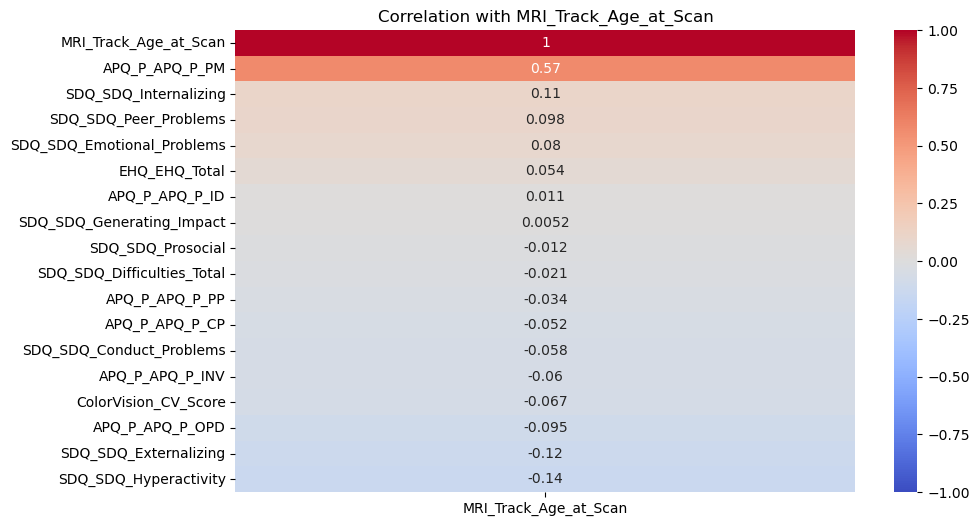

In [415]:
train_quantitative_numeric= train_quantitative.drop(columns=['participant_id'])

corr_matrix = train_quantitative_numeric.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix[['MRI_Track_Age_at_Scan']].sort_values(by='MRI_Track_Age_at_Scan', ascending=False), 
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation with MRI_Track_Age_at_Scan")
plt.show()

In [417]:
train_quantitative.describe()

,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
count,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000
mean,58.876917,13.164880,3.781533,13.205276,39.374279,17.785655,16.393240,25.246496,2.059357,12.122836,2.307502,7.557296,4.073372,5.497939,4.565540,2.258038,7.683430,11.129633
std,49.855501,2.780624,1.376700,3.811772,6.245928,3.764112,5.376994,3.950529,2.023322,6.577207,2.167549,4.166627,2.819731,2.836764,3.519634,2.090414,2.190295,2.877558
min,-100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45.600000,14.000000,3.000000,11.000000,36.000000,16.000000,13.000000,23.000000,0.000000,7.000000,1.000000,4.000000,2.000000,4.000000,2.000000,0.000000,6.000000,9.096144
50%,76.670000,14.000000,3.000000,13.000000,40.000000,18.000000,16.000000,26.000000,2.000000,12.000000,2.000000,7.000000,4.000000,6.000000,4.000000,2.000000,8.000000,10.680721
75%,93.400000,14.000000,4.000000,16.000000,43.000000,20.000000,19.000000,28.000000,3.000000,17.000000,4.000000,10.000000,6.000000,8.000000,7.000000,4.000000,10.000000,12.749509
max,100.000000,14.000000,12.000000,28.000000,50.000000,28.000000,37.000000,30.000000,10.000000,34.000000,10.000000,20.000000,10.000000,10.000000,17.000000,9.000000,10.000000,21.564453


In [419]:
imputer = KNNImputer(n_neighbors=5)
train_quantitative_numeric = train_quantitative.drop(columns=['participant_id']) 
train_quantitative_imputed = imputer.fit_transform(train_quantitative_numeric)

train_quantitative[train_quantitative_numeric.columns] = train_quantitative_imputed

In [421]:
train_quantitative.isnull().sum()

participant_id                0
EHQ_EHQ_Total                 0
ColorVision_CV_Score          0
APQ_P_APQ_P_CP                0
APQ_P_APQ_P_ID                0
APQ_P_APQ_P_INV               0
APQ_P_APQ_P_OPD               0
APQ_P_APQ_P_PM                0
APQ_P_APQ_P_PP                0
SDQ_SDQ_Conduct_Problems      0
SDQ_SDQ_Difficulties_Total    0
SDQ_SDQ_Emotional_Problems    0
SDQ_SDQ_Externalizing         0
SDQ_SDQ_Generating_Impact     0
SDQ_SDQ_Hyperactivity         0
SDQ_SDQ_Internalizing         0
SDQ_SDQ_Peer_Problems         0
SDQ_SDQ_Prosocial             0
MRI_Track_Age_at_Scan         0
dtype: int64

In [423]:
train_quantitative.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   participant_id              1213 non-null   object 
 1   EHQ_EHQ_Total               1213 non-null   float64
 2   ColorVision_CV_Score        1213 non-null   float64
 3   APQ_P_APQ_P_CP              1213 non-null   float64
 4   APQ_P_APQ_P_ID              1213 non-null   float64
 5   APQ_P_APQ_P_INV             1213 non-null   float64
 6   APQ_P_APQ_P_OPD             1213 non-null   float64
 7   APQ_P_APQ_P_PM              1213 non-null   float64
 8   APQ_P_APQ_P_PP              1213 non-null   float64
 9   SDQ_SDQ_Conduct_Problems    1213 non-null   float64
 10  SDQ_SDQ_Difficulties_Total  1213 non-null   float64
 11  SDQ_SDQ_Emotional_Problems  1213 non-null   float64
 12  SDQ_SDQ_Externalizing       1213 non-null   float64
 13  SDQ_SDQ_Generating_Impact   1213 

In [425]:
train_quantitative.describe()

,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
count,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000,1213.000000
mean,58.876917,13.164880,3.781533,13.205276,39.374279,17.785655,16.393240,25.246496,2.059357,12.122836,2.307502,7.557296,4.073372,5.497939,4.565540,2.258038,7.683430,11.129633
std,49.855501,2.780624,1.376700,3.811772,6.245928,3.764112,5.376994,3.950529,2.023322,6.577207,2.167549,4.166627,2.819731,2.836764,3.519634,2.090414,2.190295,2.877558
min,-100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45.600000,14.000000,3.000000,11.000000,36.000000,16.000000,13.000000,23.000000,0.000000,7.000000,1.000000,4.000000,2.000000,4.000000,2.000000,0.000000,6.000000,9.096144
50%,76.670000,14.000000,3.000000,13.000000,40.000000,18.000000,16.000000,26.000000,2.000000,12.000000,2.000000,7.000000,4.000000,6.000000,4.000000,2.000000,8.000000,10.680721
75%,93.400000,14.000000,4.000000,16.000000,43.000000,20.000000,19.000000,28.000000,3.000000,17.000000,4.000000,10.000000,6.000000,8.000000,7.000000,4.000000,10.000000,12.749509
max,100.000000,14.000000,12.000000,28.000000,50.000000,28.000000,37.000000,30.000000,10.000000,34.000000,10.000000,20.000000,10.000000,10.000000,17.000000,9.000000,10.000000,21.564453


In [431]:
df_quant_cate = pd.merge(train_categorical_encoded, train_quantitative)

In [433]:
df_quant_cate.head()

,participant_id,Basic_Demos_Enroll_Year,PreInt_Demos_Fam_Child_Race,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ,Basic_Demos_Study_Site_1,Basic_Demos_Study_Site_2,Basic_Demos_Study_Site_3,...,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
0,UmrK0vMLopoR,2016,0,21,45,21,45,1,0,0,...,0.0,6.0,1.0,5.0,0.0,5.0,1.0,0.0,10.0,8.979603
1,CPaeQkhcjg7d,2019,2,15,15,0,0,0,0,1,...,0.0,18.0,6.0,8.0,7.0,8.0,10.0,4.0,5.0,12.734177
2,Nb4EetVPm3gs,2016,8,18,40,0,0,1,0,0,...,1.0,14.0,2.0,8.0,5.0,7.0,6.0,4.0,9.0,8.239904
3,p4vPhVu91o4b,2018,8,15,30,18,0,0,0,1,...,6.0,24.0,4.0,16.0,9.0,10.0,8.0,4.0,6.0,9.523203
4,M09PXs7arQ5E,2019,1,15,20,0,0,0,0,1,...,1.0,18.0,4.0,11.0,4.0,10.0,7.0,3.0,9.0,8.940679


In [435]:
df_quant_cate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 38 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   participant_id                      1213 non-null   object 
 1   Basic_Demos_Enroll_Year             1213 non-null   int64  
 2   PreInt_Demos_Fam_Child_Race         1213 non-null   int64  
 3   Barratt_Barratt_P1_Edu              1213 non-null   int64  
 4   Barratt_Barratt_P1_Occ              1213 non-null   int64  
 5   Barratt_Barratt_P2_Edu              1213 non-null   int64  
 6   Barratt_Barratt_P2_Occ              1213 non-null   int64  
 7   Basic_Demos_Study_Site_1            1213 non-null   int32  
 8   Basic_Demos_Study_Site_2            1213 non-null   int32  
 9   Basic_Demos_Study_Site_3            1213 non-null   int32  
 10  Basic_Demos_Study_Site_4            1213 non-null   int32  
 11  PreInt_Demos_Fam_Child_Ethnicity_0  1213 no

In [437]:
df_quant_cate.isnull().sum()


participant_id                        0
Basic_Demos_Enroll_Year               0
PreInt_Demos_Fam_Child_Race           0
Barratt_Barratt_P1_Edu                0
Barratt_Barratt_P1_Occ                0
Barratt_Barratt_P2_Edu                0
Barratt_Barratt_P2_Occ                0
Basic_Demos_Study_Site_1              0
Basic_Demos_Study_Site_2              0
Basic_Demos_Study_Site_3              0
Basic_Demos_Study_Site_4              0
PreInt_Demos_Fam_Child_Ethnicity_0    0
PreInt_Demos_Fam_Child_Ethnicity_1    0
PreInt_Demos_Fam_Child_Ethnicity_2    0
PreInt_Demos_Fam_Child_Ethnicity_3    0
MRI_Track_Scan_Location_0             0
MRI_Track_Scan_Location_1             0
MRI_Track_Scan_Location_2             0
MRI_Track_Scan_Location_3             0
MRI_Track_Scan_Location_4             0
EHQ_EHQ_Total                         0
ColorVision_CV_Score                  0
APQ_P_APQ_P_CP                        0
APQ_P_APQ_P_ID                        0
APQ_P_APQ_P_INV                       0


In [439]:
missing_data = df_quant_cate["MRI_Track_Age_at_Scan"].isnull().sum()
total_data = len(df)
print(f"Missing values: {missing_data} / Total rows: {total_data} ({(missing_data/total_data)*100:.2f}% missing)")


Missing values: 0 / Total rows: 1213 (0.00% missing)


In [441]:
train_functional.to_pickle("proccessed_functional_data.pkl")


In [443]:
train_categorical= pd.merge(train_categorical_encoded, train_solutions)

## Solution Training Data

In [446]:
train_solutions=pd.read_excel("../TRAIN/TRAINING_SOLUTIONS.xlsx")

In [448]:
train_solutions.head()

,participant_id,ADHD_Outcome,Sex_F
0,UmrK0vMLopoR,1,1
1,CPaeQkhcjg7d,1,0
2,Nb4EetVPm3gs,1,0
3,p4vPhVu91o4b,1,1
4,M09PXs7arQ5E,1,1


In [450]:
train_solutions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   participant_id  1213 non-null   object
 1   ADHD_Outcome    1213 non-null   int64 
 2   Sex_F           1213 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 28.6+ KB


## Merged Data

In [453]:
df1_target = pd.merge(df_quant_cate,train_solutions)

In [454]:
df1_target.head()

,participant_id,Basic_Demos_Enroll_Year,PreInt_Demos_Fam_Child_Race,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ,Basic_Demos_Study_Site_1,Basic_Demos_Study_Site_2,Basic_Demos_Study_Site_3,...,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan,ADHD_Outcome,Sex_F
0,UmrK0vMLopoR,2016,0,21,45,21,45,1,0,0,...,1.0,5.0,0.0,5.0,1.0,0.0,10.0,8.979603,1,1
1,CPaeQkhcjg7d,2019,2,15,15,0,0,0,0,1,...,6.0,8.0,7.0,8.0,10.0,4.0,5.0,12.734177,1,0
2,Nb4EetVPm3gs,2016,8,18,40,0,0,1,0,0,...,2.0,8.0,5.0,7.0,6.0,4.0,9.0,8.239904,1,0
3,p4vPhVu91o4b,2018,8,15,30,18,0,0,0,1,...,4.0,16.0,9.0,10.0,8.0,4.0,6.0,9.523203,1,1
4,M09PXs7arQ5E,2019,1,15,20,0,0,0,0,1,...,4.0,11.0,4.0,10.0,7.0,3.0,9.0,8.940679,1,1


In [457]:
df2_target= pd.merge(train_functional,train_solutions)

In [459]:
df2_target.head()

,participant_id,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,0throw_6thcolumn,0throw_7thcolumn,0throw_8thcolumn,0throw_9thcolumn,...,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn,ADHD_Outcome,Sex_F
0,70z8Q2xdTXM3,0.093473,0.146902,0.067893,0.015141,0.070221,0.063997,0.055382,-0.035335,0.068583,...,-0.050968,-0.014365,0.128066,0.112646,-0.058980,0.028228,0.133582,0.143372,1,0
1,WHWymJu6zNZi,0.029580,0.179323,0.112933,0.038291,0.104899,0.064250,0.008488,0.077505,-0.004750,...,0.020891,0.017754,0.094040,0.035141,0.032537,0.075007,0.115350,0.138200,1,1
2,4PAQp1M6EyAo,-0.051580,0.139734,0.068295,0.046991,0.111085,0.026978,0.151377,0.021198,0.083721,...,0.028773,0.024556,0.166343,0.058925,0.035485,0.063661,0.042862,0.162162,1,1
3,obEacy4Of68I,0.016273,0.204702,0.115980,0.043103,0.056431,0.057615,0.055773,0.075030,0.001033,...,0.018607,0.016193,0.072955,0.130135,0.056120,0.084784,0.114148,0.190584,1,1
4,s7WzzDcmDOhF,0.065771,0.098714,0.097604,0.112988,0.071139,0.085607,0.019392,-0.036403,-0.020375,...,-0.047530,-0.031443,0.221213,0.007343,0.005763,0.083820,0.079582,0.067269,1,1


In [461]:
df1_target.to_pickle("processed_target1.pkl")


In [463]:
df2_target.to_pickle("processed_target2.pkl")

In [465]:
train_categorical= pd.merge(train_categorical_encoded, train_solutions)

In [467]:
train_categorical.head()

,participant_id,Basic_Demos_Enroll_Year,PreInt_Demos_Fam_Child_Race,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ,Basic_Demos_Study_Site_1,Basic_Demos_Study_Site_2,Basic_Demos_Study_Site_3,...,PreInt_Demos_Fam_Child_Ethnicity_1,PreInt_Demos_Fam_Child_Ethnicity_2,PreInt_Demos_Fam_Child_Ethnicity_3,MRI_Track_Scan_Location_0,MRI_Track_Scan_Location_1,MRI_Track_Scan_Location_2,MRI_Track_Scan_Location_3,MRI_Track_Scan_Location_4,ADHD_Outcome,Sex_F
0,UmrK0vMLopoR,2016,0,21,45,21,45,1,0,0,...,0,0,0,0,1,0,0,0,1,1
1,CPaeQkhcjg7d,2019,2,15,15,0,0,0,0,1,...,1,0,0,0,0,0,1,0,1,0
2,Nb4EetVPm3gs,2016,8,18,40,0,0,1,0,0,...,1,0,0,0,1,0,0,0,1,0
3,p4vPhVu91o4b,2018,8,15,30,18,0,0,0,1,...,0,0,0,0,0,0,1,0,1,1
4,M09PXs7arQ5E,2019,1,15,20,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,1


In [469]:
train_quantitative= pd.merge(train_quantitative, train_solutions)

In [471]:
train_quantitative.head()

,participant_id,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,...,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan,ADHD_Outcome,Sex_F
0,UmrK0vMLopoR,40.00,13.0,3.0,10.0,47.0,13.0,11.0,28.0,0.0,...,1.0,5.0,0.0,5.0,1.0,0.0,10.0,8.979603,1,1
1,CPaeQkhcjg7d,-94.47,14.0,3.0,13.0,34.0,18.0,23.0,30.0,0.0,...,6.0,8.0,7.0,8.0,10.0,4.0,5.0,12.734177,1,0
2,Nb4EetVPm3gs,-46.67,14.0,4.0,10.0,35.0,16.0,10.0,29.0,1.0,...,2.0,8.0,5.0,7.0,6.0,4.0,9.0,8.239904,1,0
3,p4vPhVu91o4b,-26.68,10.0,5.0,12.0,39.0,19.0,16.0,28.0,6.0,...,4.0,16.0,9.0,10.0,8.0,4.0,6.0,9.523203,1,1
4,M09PXs7arQ5E,0.00,14.0,5.0,15.0,40.0,20.0,24.0,28.0,1.0,...,4.0,11.0,4.0,10.0,7.0,3.0,9.0,8.940679,1,1


In [473]:
train_categorical.to_pickle("proccessed_categorical_data.pkl")

In [477]:
train_quantitative.to_pickle("proccessed_quantitatvie_data.pkl")